In [1]:
import pandas as pd

# Load the dataset
file_path = "../data/raw/deduped-jobs.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,reference,title,date_posted,date_ending,advertiser,location,city,country,salary,salary_min,salary_max,salary_frequency,salary_currency,description
0,41857664,Data Science Manager,2021-01-26,2021-03-09T23:55:00.0000000,Charles Simon Associates Ltd,London,Camden,GB,70000.0,70000.0,80000.0,YEAR,NaN,"Apply now\nData Science Manager (Data, Python,..."
1,41924233,Data Science Recruiter,2021-02-03,2021-03-03T23:55:00.0000000,Crone Corkill,South East England,London,GB,20000.0,20000.0,26000.0,YEAR,NaN,"Apply now\nData Science Recruiter - £20,000-£2..."
2,41752222,Data Science Lead,2021-01-14,2021-02-25T23:55:00.0000000,Harnham,South East England,London,GB,75000.0,75000.0,80000.0,YEAR,NaN,"Apply now\nDATA SCIENCE LEAD\nUP TO £80,000 + ..."
3,41642513,Data Science Consultant,2020-12-27,2021-02-07T23:55:00.0000000,QUINTON DAVIES LIMITED,Avon,Bristol,GB,35000.0,35000.0,65000.0,YEAR,NaN,Apply now\nQuinton Davies have been engaged by...
4,41764338,Data Science Manager,2021-01-15,2021-02-26T23:55:00.0000000,Data Idols,South East England,London,GB,100000.0,100000.0,120000.0,YEAR,NaN,Apply now\nData Science Manager\n\nData Idols ...


In [3]:
# Check the overall structure of the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Get basic summary statistics for numeric columns
df.describe()

# Check how many rows and columns are present
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reference         595 non-null    int64  
 1   title             595 non-null    object 
 2   date_posted       595 non-null    object 
 3   date_ending       595 non-null    object 
 4   advertiser        595 non-null    object 
 5   location          595 non-null    object 
 6   city              595 non-null    object 
 7   country           595 non-null    object 
 8   salary            595 non-null    float64
 9   salary_min        595 non-null    float64
 10  salary_max        595 non-null    float64
 11  salary_frequency  595 non-null    object 
 12  salary_currency   0 non-null      float64
 13  description       595 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 65.2+ KB


(595, 14)

In [5]:
# Convert date columns to proper datetime format
df['date_posted'] = pd.to_datetime(df['date_posted'], errors='coerce')
df['date_ending'] = pd.to_datetime(df['date_ending'], errors='coerce')

# Remove any duplicate job postings based on reference ID
df = df.drop_duplicates(subset='reference')

# Check if any dates failed to convert or if duplicates were removed
print("Rows after cleaning:", df.shape[0])
print("Missing dates in 'date_posted':", df['date_posted'].isnull().sum())
print("Missing dates in 'date_ending':", df['date_ending'].isnull().sum())


Rows after cleaning: 595
Missing dates in 'date_posted': 0
Missing dates in 'date_ending': 0


In [7]:
# Check the overall salary range
print("Overall salary range (min to max):")
print(df['salary'].min(), "to", df['salary'].max())

# Top 10 job titles by frequency
top_titles = df['title'].value_counts().head(10)
print("\nTop 10 most common job titles:")
print(top_titles)

# Count of unique advertisers (companies)
unique_companies = df['advertiser'].nunique()
print("\nNumber of unique companies posting jobs:", unique_companies)

# Jobs by country
print("\nJob postings by country:")
print(df['country'].value_counts())


Overall salary range (min to max):
10000.0 to 150000.0

Top 10 most common job titles:
title
Data Scientist                41
Data Engineer                 32
Senior Data Engineer          24
Senior Data Scientist         22
Oracle DBA                     9
Principal Data Scientist       5
Python Developer               5
Data Engineering Tech Lead     5
Lead Data Scientist            5
Data Science Consultant        4
Name: count, dtype: int64

Number of unique companies posting jobs: 165

Job postings by country:
country
GB    595
Name: count, dtype: int64


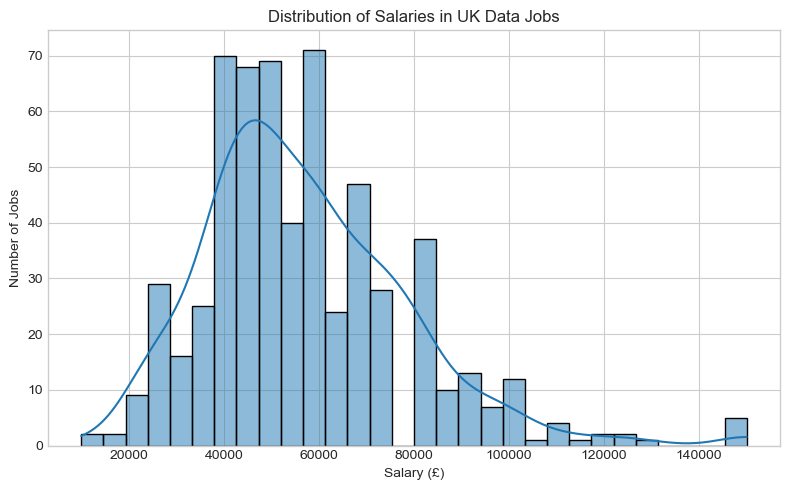

/var/folders/f_/k0b87rgs0rl7483lwxqrn0fc0000gn/T/ipykernel_12367/1766262792.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette="Blues_d")


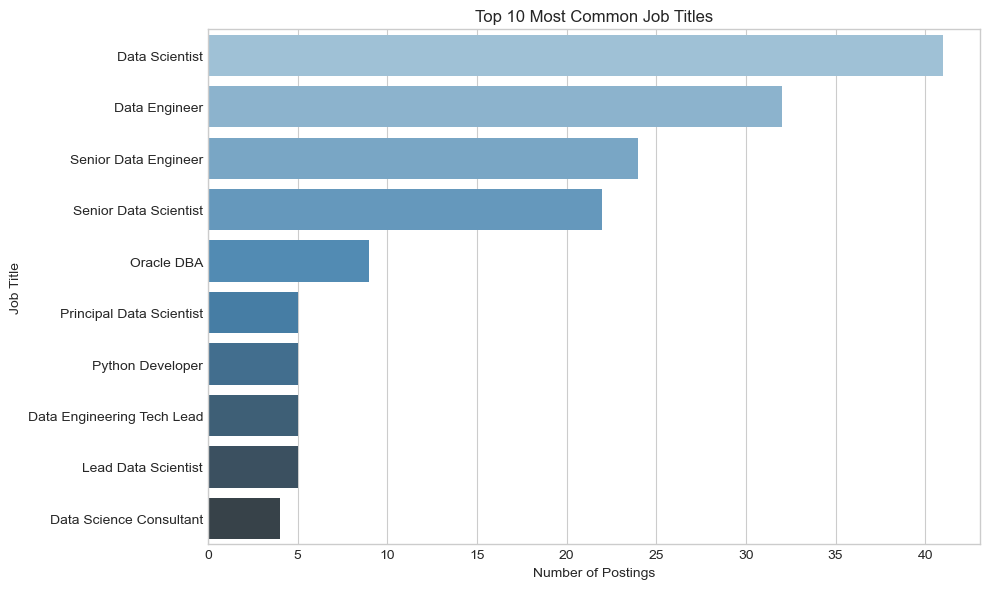

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean visual style
plt.style.use("seaborn-v0_8-whitegrid")

# 1. Salary Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['salary'], bins=30, kde=True)
plt.title("Distribution of Salaries in UK Data Jobs")
plt.xlabel("Salary (£)")
plt.ylabel("Number of Jobs")
plt.tight_layout()
plt.show()

# 2. Top 10 Job Titles
plt.figure(figsize=(10, 6))
sns.barplot(x=top_titles.values, y=top_titles.index, palette="Blues_d")
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Number of Postings")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()


Top 10 Cities with Most Job Postings:
 city
London        309
Manchester     43
Bristol        17
Camden         16
Birmingham     14
Nottingham     11
Southwark      11
Reading         9
Cheltenham      9
Uxbridge        9
Name: count, dtype: int64


/var/folders/f_/k0b87rgs0rl7483lwxqrn0fc0000gn/T/ipykernel_12367/406925573.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette="Greens_d")


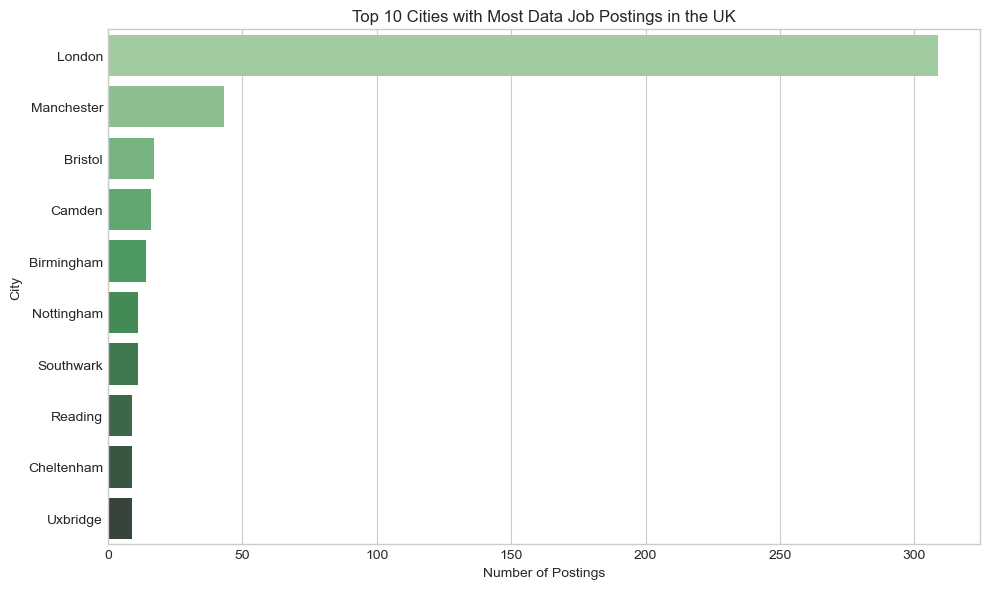


Average Salary by City:
 city
Reigate               100000.000000
Crawley                85000.000000
Oxfordshire            83333.333333
Hertfordshire          82500.000000
Paddington             80000.000000
Brentford              75000.000000
Covent Garden          72500.000000
Maidenhead             70000.000000
Stockton-on-Tees       70000.000000
North West England     70000.000000
Name: salary, dtype: float64


/var/folders/f_/k0b87rgs0rl7483lwxqrn0fc0000gn/T/ipykernel_12367/406925573.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_city.values, y=avg_salary_city.index, palette="Blues_d")


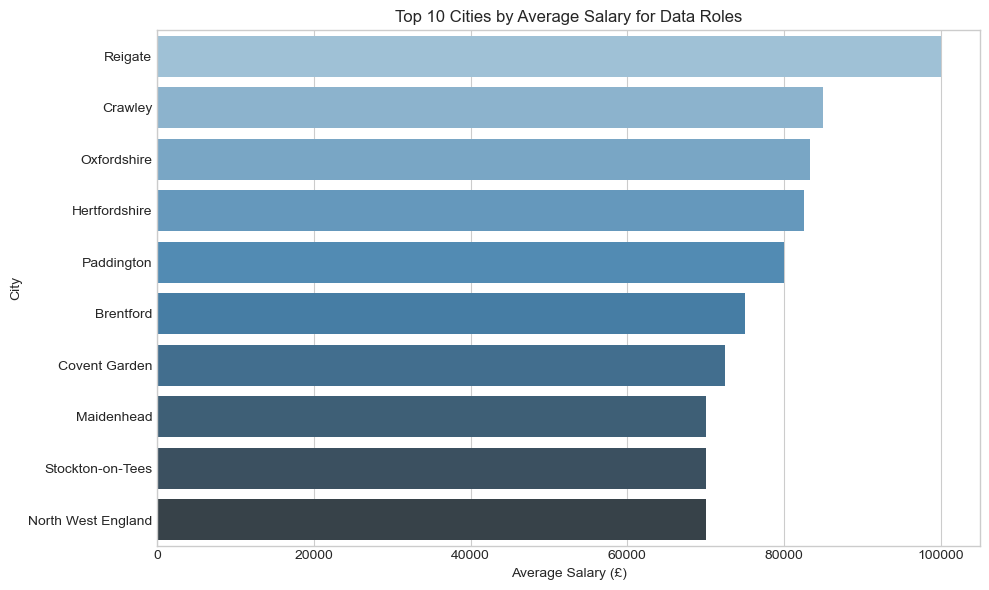

In [11]:
# Analyse job distribution by city and location
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Top 10 cities with the most job postings
city_counts = df['city'].value_counts().head(10)
print("Top 10 Cities with Most Job Postings:\n", city_counts)

plt.figure(figsize=(10,6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette="Greens_d")
plt.title("Top 10 Cities with Most Data Job Postings in the UK")
plt.xlabel("Number of Postings")
plt.ylabel("City")
plt.tight_layout()
plt.show()

# 2. Average salary by city
avg_salary_city = df.groupby('city')['salary'].mean().sort_values(ascending=False).head(10)
print("\nAverage Salary by City:\n", avg_salary_city)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_city.values, y=avg_salary_city.index, palette="Blues_d")
plt.title("Top 10 Cities by Average Salary for Data Roles")
plt.xlabel("Average Salary (£)")
plt.ylabel("City")
plt.tight_layout()
plt.show()


### Insights: City-Level Analysis

After analysing the dataset, it’s clear that London dominates the UK data job market with the highest number of postings — far ahead of any other city.  
Manchester comes next, followed by Bristol, Birmingham, and Nottingham, which also show active hiring but at smaller scales compared to London.  

When comparing salaries, Reigate and Crawley lead with the highest average pay for data-related roles, followed by Oxfordshire and Hertfordshire.  
Interestingly, while London has the most openings, smaller towns and regional hubs tend to offer higher salaries, likely to attract experienced professionals or senior-level talent based outside the capital.


In [14]:
# Export cleaned dataset for Power BI
cleaned_file_path = "../data/processed/cleaned_jobs.csv"

# Save the DataFrame
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")


Cleaned dataset saved to: ../data/processed/cleaned_jobs.csv
